In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [3]:
from google.colab import files
uploaded=files.upload()

Saving NSE.csv to NSE.csv


In [4]:
data = pd.read_csv('NSE.csv')

In [5]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [6]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1230,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09
1231,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
1232,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
1233,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
1234,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94


In [7]:
data['Date']=pd.to_datetime(data['Date'])
print(type(data.Date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [8]:
df=data.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1234,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94
1233,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
1232,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
1231,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
1230,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09


In [10]:
df.reset_index(inplace=True)

In [11]:
df.head()

,level_0,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,0,1234,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94
1,1,1233,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
2,2,1232,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
3,3,1231,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
4,4,1230,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09


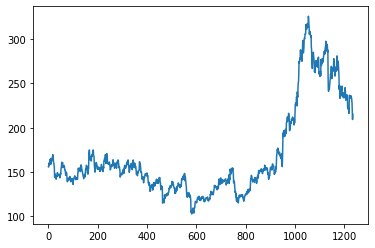

In [12]:
plt.plot(df['Close'])

In [13]:
df1=df['Close']

In [14]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.23823398],
       [0.2371134 ],
       [0.25773196],
       ...,
       [0.51792918],
       [0.47758853],
       [0.50425818]])

In [15]:
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [16]:
training_size,test_size

(864, 371)

In [17]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [18]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
print(X_train.shape), print(y_train.shape)

(763, 100)
(763,)


(None, None)

In [20]:
print(X_test.shape), print(ytest.shape)

(270, 100)
(270,)


(None, None)

In [21]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(X_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
11/11 [==============================] - 8s 285ms/step - loss: 0.0099 - val_loss: 0.0014
Epoch 2/60
11/11 [==============================] - 2s 177ms/step - loss: 0.0027 - val_loss: 0.0014
Epoch 3/60
11/11 [==============================] - 2s 166ms/step - loss: 0.0021 - val_loss: 8.8479e-04
Epoch 4/60
11/11 [==============================] - 2s 170ms/step - loss: 0.0014 - val_loss: 6.7285e-04
Epoch 5/60
11/11 [==============================] - 2s 177ms/step - loss: 0.0011 - val_loss: 5.6218e-04
Epoch 6/60
11/11 [==============================] - 2s 170ms/step - loss: 0.0011 - val_loss: 6.1755e-04
Epoch 7/60
11/11 [==============================] - 2s 174ms/step - loss: 9.9801e-04 - val_loss: 6.3086e-04
Epoch 8/60
11/11 [==============================] - 2s 166ms/step - loss: 9.5277e-04 - val_loss: 6.1276e-04
Epoch 9/60
11/11 [==============================] - 2s 163ms/step - loss: 9.4064e-04 - val_loss: 5.3405e-04
Epoch 10/60
11/11 [==============================] - 2s 166m

In [25]:
test_predict=model.predict(X_test)

In [26]:
test_predict1=scaler.inverse_transform(test_predict)

In [27]:
test_predict1

array([[192.03337],
       [192.63364],
       [195.6597 ],
       [199.28423],
       [202.43707],
       [205.00543],
       [207.24011],
       [207.28984],
       [207.36092],
       [207.045  ],
       [207.34776],
       [208.72198],
       [209.54851],
       [209.40468],
       [205.76656],
       [200.31366],
       [198.01067],
       [196.64134],
       [197.451  ],
       [200.04929],
       [203.094  ],
       [205.09062],
       [207.16241],
       [208.71587],
       [209.08138],
       [208.65683],
       [208.15315],
       [208.44255],
       [208.5328 ],
       [208.25209],
       [208.06291],
       [207.03316],
       [205.29347],
       [203.37839],
       [203.85309],
       [204.34256],
       [205.91379],
       [210.6412 ],
       [217.42523],
       [223.0831 ],
       [226.36261],
       [226.70769],
       [224.93214],
       [225.36504],
       [223.70862],
       [221.31041],
       [224.30202],
       [227.70494],
       [229.57262],
       [233.97781],


In [28]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(ytest,test_predict))

0.04315154929702199